In [47]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix as sm
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score

In [15]:
wine = pd.read_csv('wine.data.csv')
print(wine['Label'].unique())
wine.head()

[1 2 3]


Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
..    ...      ...         ...   ...                ...        ...   
95      2    12.47        1.52  2.20               19.0        162   
96      2    11.81        2.12  2.74               21.5        134   
97      2    12.29        1.41  1.98               16.0         85   
98      2    12.37        1.07  2.10               18.5         88   
99      2    12.29        3.17  2.21               18.0         88   

    Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0            2.80        3.06                  0.28             2.29   
1            2.65        2.76                  0.26             1.28   
2            2.80        3.24                  0.30             2.81   
3            3.85        3.49                  0.24             2.18   
4            2.80        2.69                  0.39             1.82   
..            ...         ...                   ...              ...   
95           2.50        2.27                  0.32             3.28   
96           1.60        0.99                  0.14             1.56   
97           2.55        2.50                  0.29             1.77   
98           3.52        3.75                  0.24             1.95   
99           2.85        2.99                  0.45             2.81   

    Color intensity   Hue  OD280  Proline  
0              5.64  1.04   3.92     1065  
1              4.38  1.05   3.40     1050  
2              5.68  1.03   3.17     1185  
3              7.80  0.86   3.45     1480  
4              4.32  1.04   2.93      735  
..              ...   ...    ...      ...  
95             2.60  1.16   2.63      937  
96             2.50  0.95   2.26      625  
97             2.90  1.23   2.74      428  
98             4.50  1.04   2.77      660  
99             2.30  1.42   2.83      406  

[100 rows x 14 columns]

In [29]:
label = wine['Label']
del wine['Label']
print("Types of variables:\n", wine.dtypes)
wine.describe()

Types of variables:
 Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object


Alcohol  Malic acid         Ash  Alcalinity of ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

Text(0.5, 1.0, 'Wine Scatter Plot Matrix')

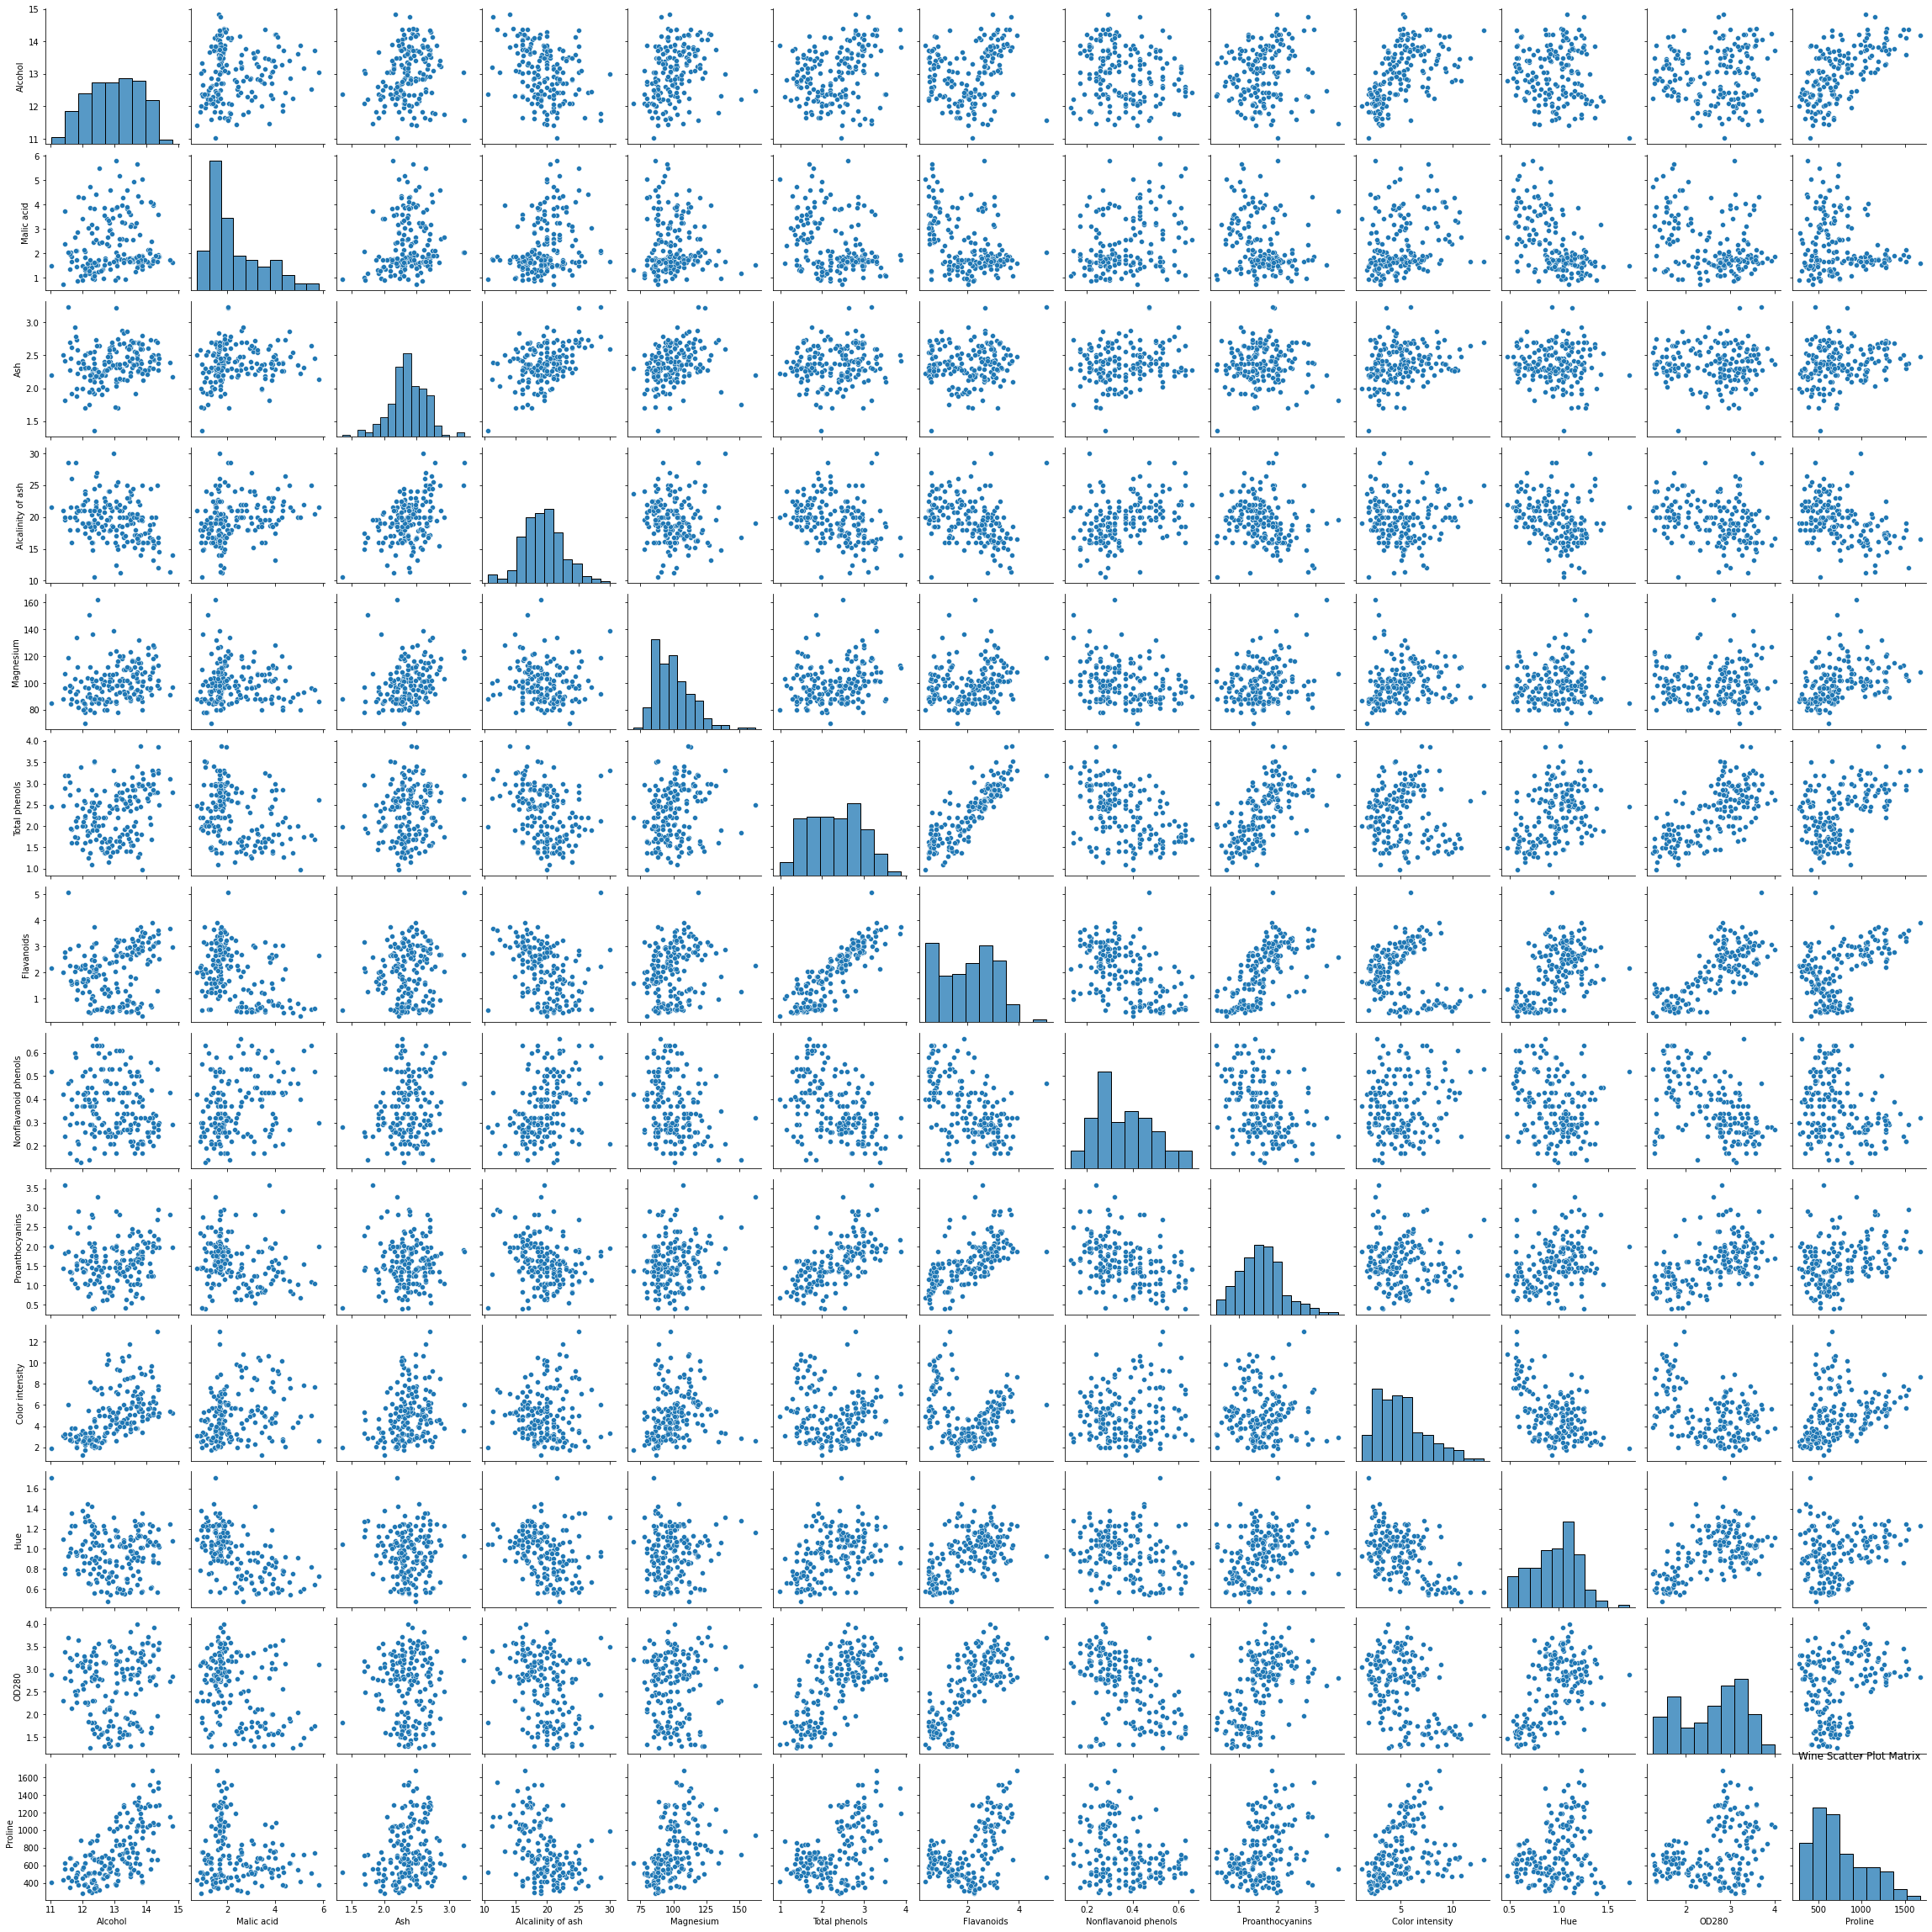

In [36]:
%matplotlib inline
sns.pairplot(wine)
plt.title("Wine Scatter Plot Matrix")

Text(0.5, 1.0, 'Wine Correlation Heat Map')

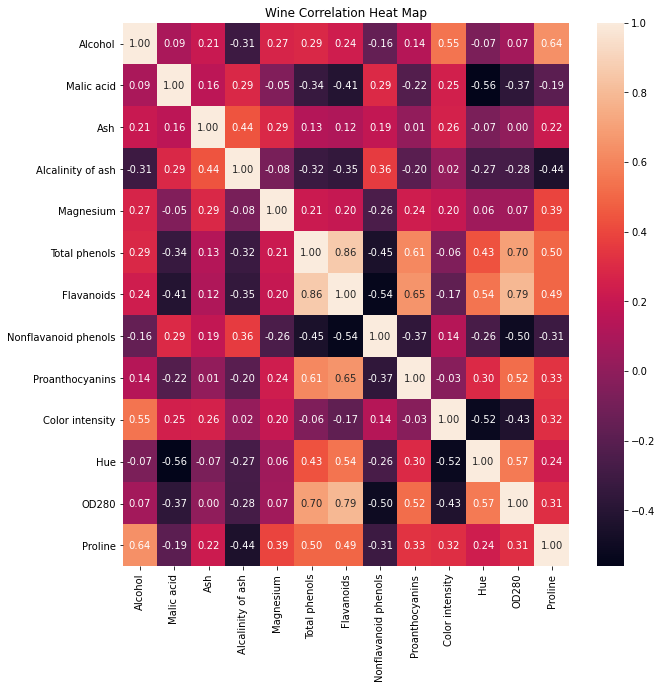

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, fmt='0.2f')
plt.title("Wine Correlation Heat Map")

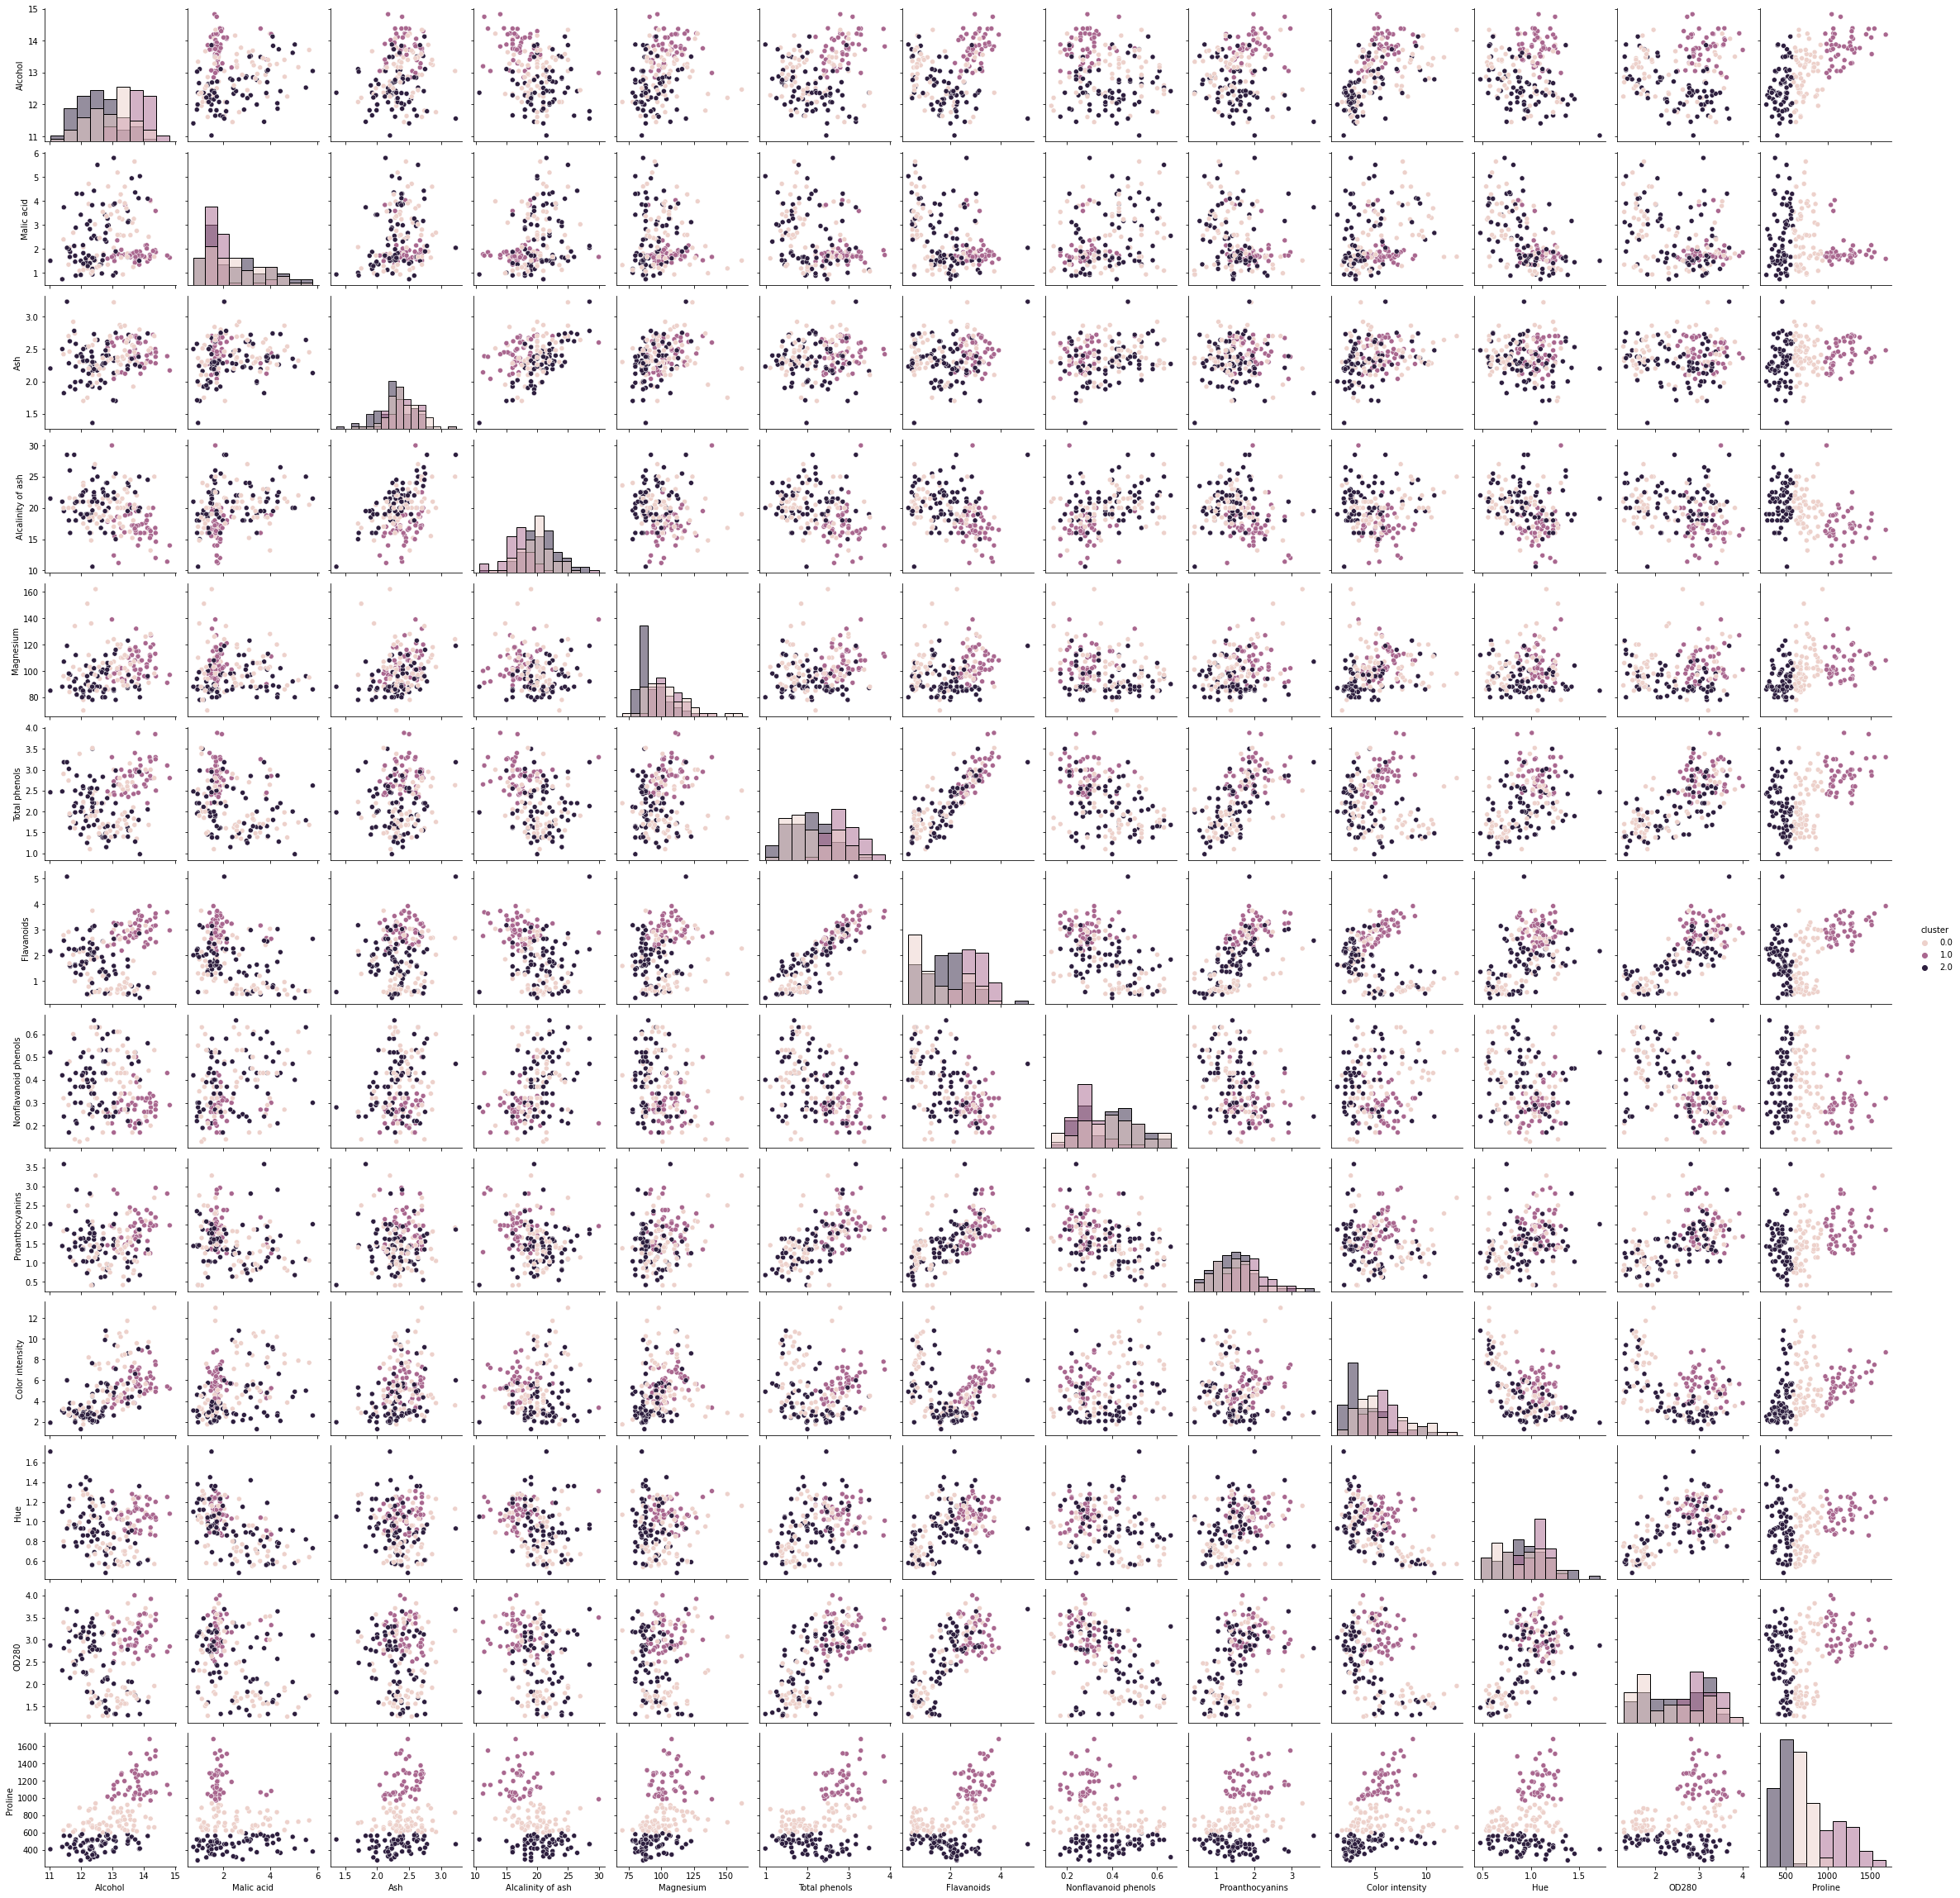

In [40]:
%matplotlib inline
kMeansClustering = KMeans(n_clusters=3, random_state=0)
res = kMeansClustering.fit_predict(wine)
label_pred_KM = res
wine["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(wine, hue="cluster", diag_kind="hist")

In [48]:
standardScalar = preprocessing.StandardScaler()
standardScalar.fit(wine)

X_scaled_array = standardScalar.transform(wine)
normalizedData = pd.DataFrame(X_scaled_array, columns = wine.columns)
